In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
import math

In [2]:
df_bit = pd.read_csv("Bitcoin prices.csv")
df_bit

,Date,Open,High,Low,Close,Adj Close,Volume
0,Thursday 18 September 2014,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
1,Friday 19 September 2014,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2,Saturday 20 September 2014,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
3,Sunday 21 September 2014,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
4,Monday 22 September 2014,399.100006,406.915985,397.130005,402.152008,402.152008,2.412760e+07
...,...,...,...,...,...,...,...
3120,Tuesday 4 April 2023,27795.273440,28433.742190,27681.304690,28168.089840,28168.089840,1.528454e+10
3121,Wednesday 5 April 2023,28169.726560,28739.238280,27843.763670,28177.984380,28177.984380,1.705232e+10
3122,Thursday 6 April 2023,28175.226560,28178.384770,27738.759770,28044.140630,28044.140630,1.383781e+10
3123,Friday 7 April 2023,28038.966800,28111.593750,27794.031250,27925.859380,27925.859380,1.086168e+10


C:\vansh\programming\project\python\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\vansh\programming\project\python\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\vansh\programming\project\python\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\vansh\programming\project\python\venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Mean Absolute Error (MAE): 359.77342154934024
Mean Squared Error (MSE): 629327.2914253839
Root Mean Squared Error (RMSE): 793.3015135655446


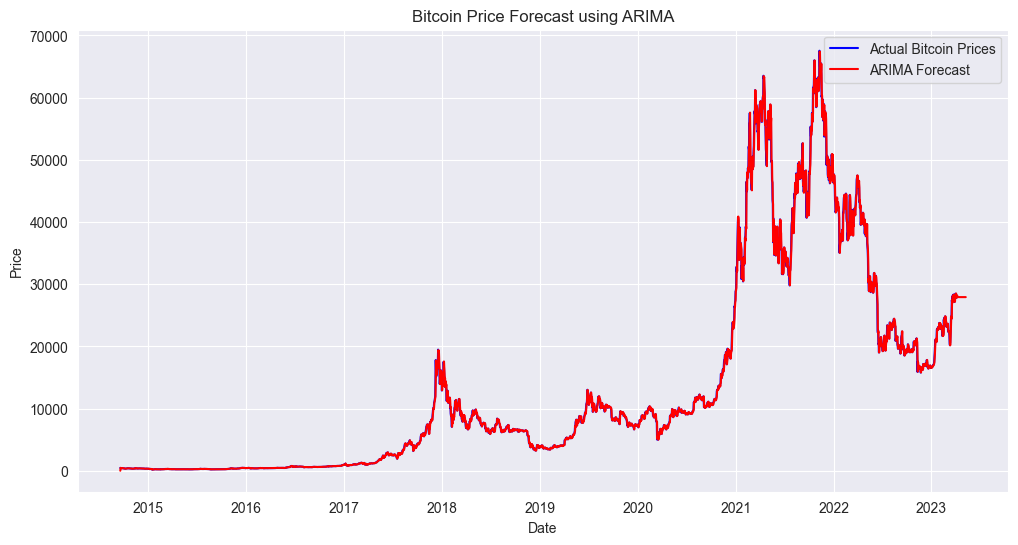

2014-09-18        0.000000
2014-09-19      451.717202
2014-09-20      425.919035
2014-09-21      398.879694
2014-09-22      412.944493
                  ...     
2023-05-05    27921.518063
2023-05-06    27921.518063
2023-05-07    27921.518063
2023-05-08    27921.518063
2023-05-09    27921.518063
Freq: D, Name: predicted_mean, Length: 3156, dtype: float64 Date
2014-09-18      456.859985
2014-09-19      424.102997
2014-09-20      394.673004
2014-09-21      408.084991
2014-09-22      399.100006
                  ...     
2023-04-04    27795.273440
2023-04-05    28169.726560
2023-04-06    28175.226560
2023-04-07    28038.966800
2023-04-08    27923.234380
Name: Open, Length: 3125, dtype: float64


In [3]:


df_bit = pd.read_csv("Bitcoin prices.csv")

df_bit['Date'] = pd.to_datetime(df_bit['Date'])

df_bit.set_index('Date', inplace=True)

model_arima = ARIMA(df_bit['Open'], order=(5, 1, 0))  # Define the ARIMA model with appropriate parameters
results_arima = model_arima.fit()

forecast_arima = results_arima.predict(start=0, end=len(df_bit) + 30, typ='levels')  # Adjust the end as needed

actual_values = df_bit['Open']
predicted_values = results_arima.fittedvalues
forecast_values = results_arima.forecast(steps=30)  # Forecast next 30 steps
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_bit.index, actual_values, label='Actual Bitcoin Prices', color="blue")
plt.plot(forecast_arima.index, forecast_arima, label='ARIMA Forecast', color ="red")
plt.title('Bitcoin Price Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
print(forecast_arima, actual_values)

C:\vansh\programming\project\python\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\vansh\programming\project\python\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\vansh\programming\project\python\venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Mean Absolute Error (MAE): 312.5019735081818
Mean Squared Error (MSE): 478856.97427223093
Root Mean Squared Error (RMSE): 691.9949235884834


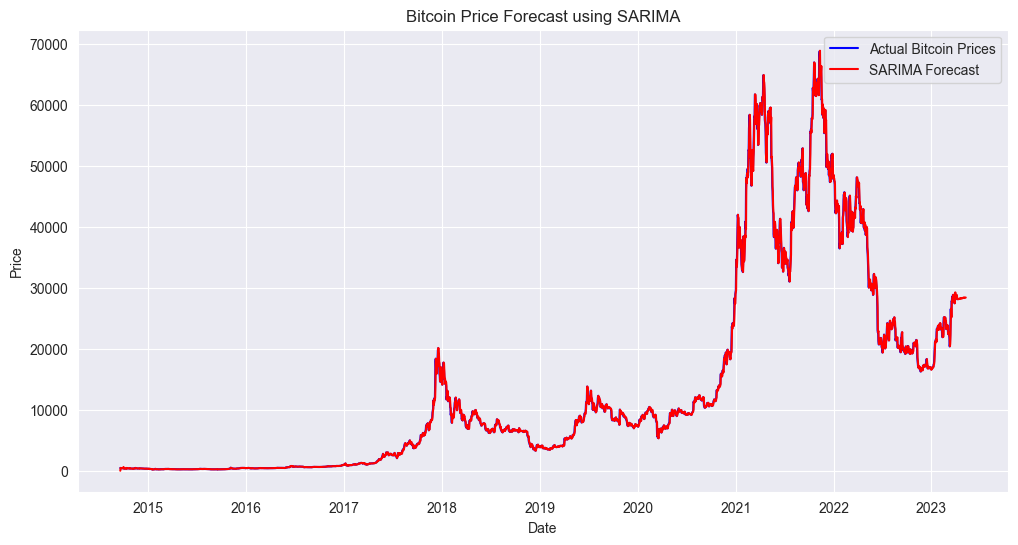

In [4]:
#SARIMAX
model_sarima = SARIMAX(df_bit['High'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust orders as needed
results_sarima = model_sarima.fit()

# Forecast
forecast_sarima = results_sarima.predict(start=0, end=len(df_bit) + 30, typ='levels')  # Adjust the end as needed

# Calculate accuracy metrics
actual_values = df_bit['High']
predicted_values = results_sarima.fittedvalues  # Use fitted values for actual data points
forecasted_values = forecast_sarima.dropna()

# Calculate metrics
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_bit.index, df_bit['High'], label='Actual Bitcoin Prices', color="b")
plt.plot(forecast_sarima.index, forecast_sarima, label='SARIMA Forecast', color="r")
plt.title('Bitcoin Price Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Epoch 1/100
76/76 [==============================] - 6s 48ms/step - loss: 0.0052 - val_loss: 0.0036
Epoch 2/100
76/76 [==============================] - 3s 44ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 3/100
76/76 [==============================] - 3s 41ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 4/100
76/76 [==============================] - 3s 41ms/step - loss: 8.4613e-04 - val_loss: 0.0015
Epoch 5/100
76/76 [==============================] - 3s 41ms/step - loss: 8.5358e-04 - val_loss: 0.0011
Epoch 6/100
76/76 [==============================] - 3s 40ms/step - loss: 8.4498e-04 - val_loss: 0.0017
Epoch 7/100
76/76 [==============================] - 3s 40ms/step - loss: 7.7496e-04 - val_loss: 0.0016
Epoch 8/100
76/76 [==============================] - 3s 40ms/step - loss: 8.9512e-04 - val_loss: 0.0011
Epoch 9/100
76/76 [==============================] - 3s 40ms/step - loss: 8.5573e-04 - val_loss: 0.0015
Epoch 10/100
76/76 [==============================] - 3s 40ms/step - loss: 7

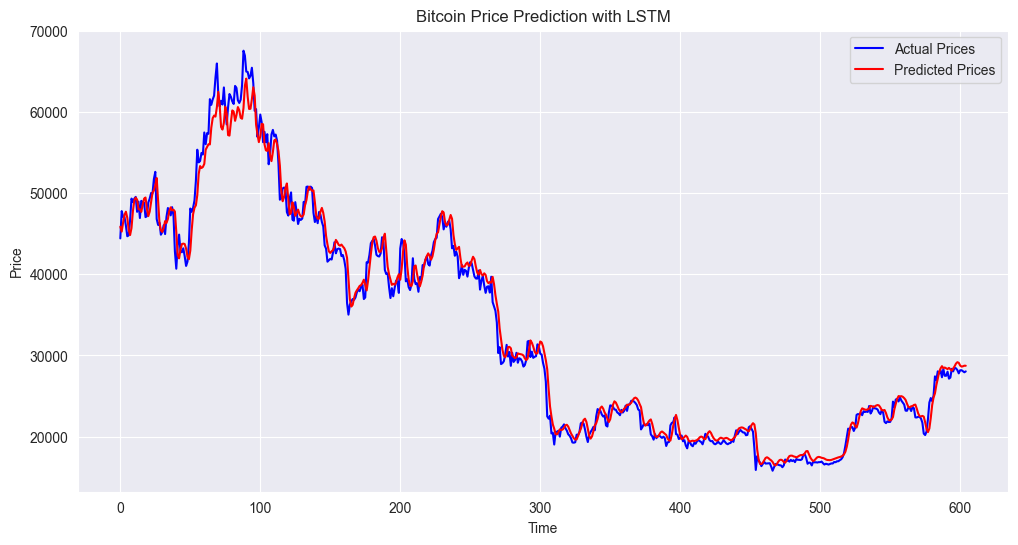

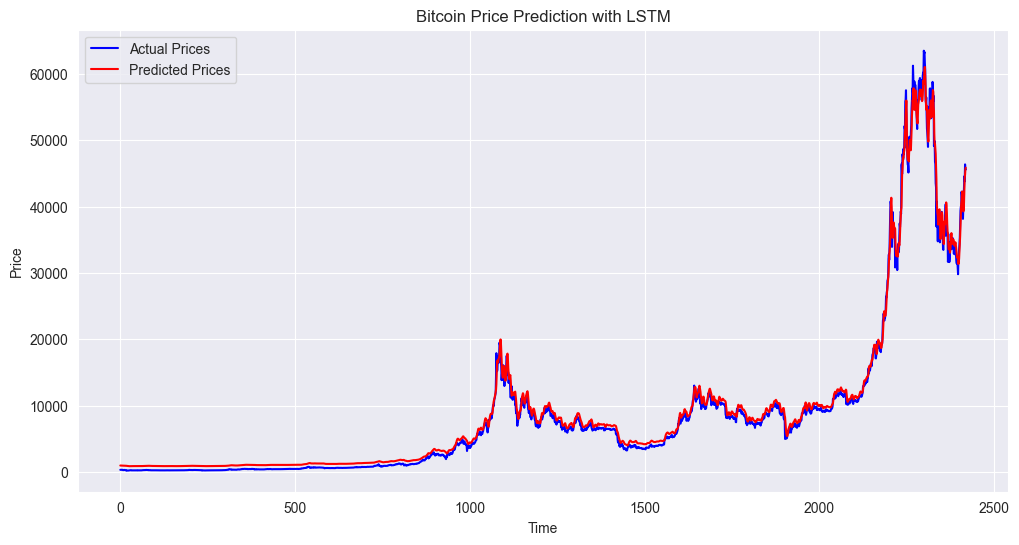

In [5]:
# LSTM

df_bit = pd.read_csv("Bitcoin prices.csv")
df_bit['Date'] = pd.to_datetime(df_bit['Date'])

scaler = MinMaxScaler(feature_range=(0, 1))
df_bit['Close_scaled'] = scaler.fit_transform(np.array(df_bit['Close'],df_bit['Date']).reshape(-1, 1))

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i : i + seq_length])
    return np.array(sequences)

# Define sequence length and split data into sequences
# Define time_steps
sequence_length=100
time_steps = 100  # Change this as needed

# Function to create sequences for LSTM with specified time steps
def create_sequences(data, time_steps):
    sequences = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i : i + time_steps])
    return np.array(sequences)

# Split the data into sequences
X = create_sequences(df_bit['Close_scaled'], time_steps)
y = df_bit['Close_scaled'][time_steps:].values

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for LSTM input [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1), activation="relu"))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model and make predictions as previously shown


# Evaluate the model
loss = model.evaluate(X_test, y_test)

# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices1 = model.predict(X_train)

print("Test Predictions:")
mae = mean_absolute_error(y_test, predicted_prices)
print(f'Mean Absolute Error (MAE): {mae}')
mse = mean_squared_error(y_test, predicted_prices)
print(f'Mean Squared Error (MSE): {mse}')
rmse = math.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

print("Train Predictions:")
mae = mean_absolute_error(y_train, predicted_prices1)
print(f'Mean Absolute Error (MAE): {mae}')
mse = mean_squared_error(y_train, predicted_prices1)
print(f'Mean Squared Error (MSE): {mse}')
rmse = math.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

#plotting

predicted_prices_inv = scaler.inverse_transform(predicted_prices)
predicted_prices1_inv = scaler.inverse_transform(predicted_prices1)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
# Plotting the actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Prices', color='blue')
plt.plot(predicted_prices_inv, label='Predicted Prices', color='red')
plt.title('Bitcoin Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_train_inv, label='Actual Prices', color='blue')
plt.plot(predicted_prices1_inv, label='Predicted Prices', color='red')
plt.title('Bitcoin Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


Root Mean Squared Error (RMSE): 1541.9300053712686


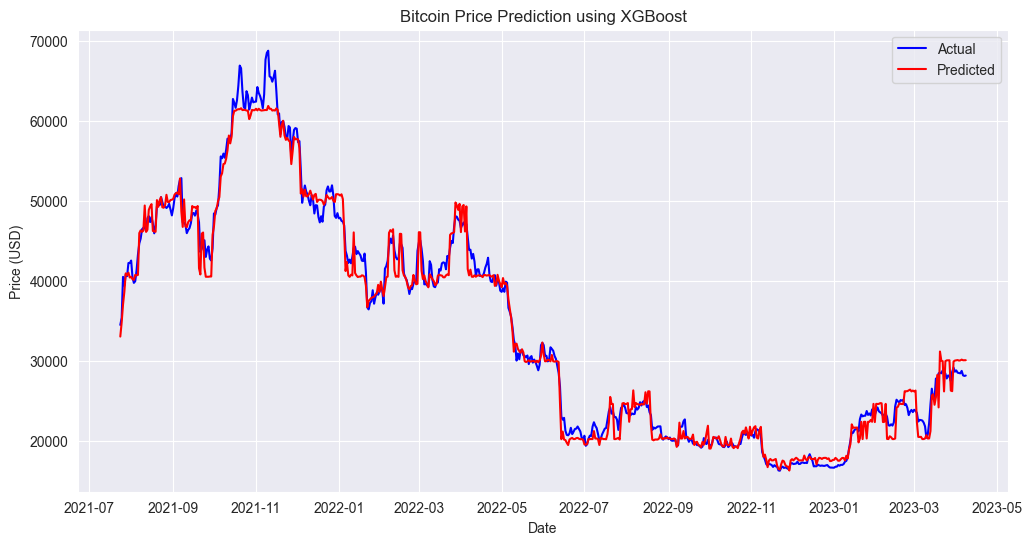

In [6]:
#XGB
df_bit = pd.read_csv("Bitcoin prices.csv")
df_bit['Date'] = pd.to_datetime(df_bit['Date'])
df_bit.set_index('Date', inplace=True)

# Feature engineering - creating lag features for the target variable
lag_days = 7  # Adjust lag days as needed
df_bit['High_Lag'] = df_bit['High'].shift(lag_days)

# Drop rows with missing values due to the lag shift
df_bit.dropna(inplace=True)

# Split dataset into features and target variable
X9 = df_bit.drop('High', axis=1)
y9 = df_bit['High']

# Splitting the dataset into train and test sets
train_size = 0.8
train_samples = int(train_size * len(df_bit))

X9_train, X9_test = X9[:train_samples], X9[train_samples:]
y9_train, y9_test = y9[:train_samples], y9[train_samples:]

# Initialize and fit XGBoost regressor
model = XGBRegressor(objective='reg:squarederror')  # Specify the objective for regression
model.fit(X9_train, y9_train)

# Make predictions
predictions = model.predict(X9_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y9_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(df_bit.index[train_samples:], y9_test, label='Actual', color='blue')
plt.plot(df_bit.index[train_samples:], predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Prediction using XGBoost')
plt.legend()
plt.show()

In [7]:
#After Applying various Machine learning models and data visualization, we found out that the best models to analyze the bitcoin values and make accurate predictions are:
# ARIMA, LSTM, SARIMA, XGBoost, Linear regression and RandomForestClassifier. We have clearly seen that the following models have a advantage while dealing with continous data. Algorithms like ARIMA and SARIMA has a accuracy of 95 to 98 percent, so we don't have to calculate it's rmse or mse.